# LSN Esercitazione 09

## Esercizio 09.1

Lo scopo di questo esercizio è risolvere il **problema del commesso viaggiatore** con un **algoritmo genetico**.

Per fare questo utilizzeremo una misura della distanza percorsa dal commesso viaggiatore ($\vec x_i$ è la posizione della $i$-esima città)
$$ L_1(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}| $$
che rappresenta la funzione costo che vogliamo minimizzare (la fitness sarà una funzione decrescente di $L_1$).

**N.B.**: Per rappresentare il nostro problema abbiamo scelto la rappresentazione 1D.

Per questo esercizio abbiamo largamente utilizzato la programmazione ad oggetti e abbiamo definito una classe <font face="Fira Code" size=3>Individual</font>, le cui istanze rappresentano un particolare percorso compiuto dal commesso viaggiatore (detto anche **TS**). Inoltre abbiamo implementato anche la classe <font face="Fira Code" size=3>Population</font> che è formata da un numero $n_\text{pop}$ di individui (noi prenderemo $n_\text{pop} = 1000$).

Ogni singolo individuo può subire delle mutazioni (le quali cambiano l'ordine con cui il TS visita le diverse città), con probabilità $p_\text{m}$; abbiamo programmato quelle richieste dal testo dell'esercizio nel file <font face="Courier" size=3>GeneticAlg.h</font>, in corrispondenza dei metodi della classe <font face="Fira Code" size=3>Individual</font>.

All'interno di una popolazione i vari individui si combinano e danno vita a un'altra generazione. Durante la produzione della generazione successiva può intervenire il crossing-over con probabilità $p_\text{c}$, per cui gli individui si scambiano delle parti di "patrimonio genetico" (ovvero i due individui che si accoppiano influenzano l'uno l'ordine delle città dell'altro). Se questo non avviene, la coppia di individui figli sarà una copia fedele (a meno di mutazioni) della coppia di individui genitori.

Come valori di $p_\text{m}$ e $p_\text{c}$, abbiamo scelto: $p_\text{m} = 5\%$ e $p_\text{c}=70\%$.

Questo è il procedimento che abbiamo seguito per ogni generazione:
1. abbiamo ordinato la popolazione in modo che il primo individuo avesse $L_1$ più alto (e quindi fitness più bassa) e che gli individui successivi avessero $L_1$ decrescente. L'ultimo individuo avrà quindi la fitness più alta;
2. abbiamo selezionato due individui da fare accoppiare in base al loro rank. Abbiamo campionato l'indice degli individui con questo algoritmo: $j=\text{int}\left(n_\text{pop} \cdot r^p\right)$, dove $r$ è un numero random uniforme tra 0 e 1. Dopo poche run ci siamo convinti che un valore dell'esponente di $r$ che permette di risolvere il TSP garantendo una convergenza rapida è $p=0.2$;
3. abbiamo fatto accoppiare i due individui con probabilità di crossing-over $p_\text{c}=70\%$ e ottenuto due individui figli (salvati in una nuova popolazione, che rappresenta la generazione successiva);
4. abbiamo ripetuto i punti 2 e 3 per $n_\text{pop}/2$ volte, ottenendo così una nuova popolazione di $n_\text{pop}$ individui;
5. abbiamo mutato ogni individuo figlio con probabilità $p_\text{m} = 5\%$ per ogni tipo di mutazione.

*Osserviamo che, nonostante abbiamo programmato un metodo per controllare che gli individui rispettino i vincoli del problema (metodo <font face="Fira Code" size=3>check()</font>), non l'abbiamo mai utilizzato perché gli individui vengono già generati correttamente.*

Siamo ora pronti a lanciare il nostro programma e osservare i risultati. Iniziamo generando le città **su una circonferenza** centrata nell'origine e di raggio unitario. Considereremo $n_\text{gen}=200$ generazioni.

Nei grafici presenti qui sotto mostriamo rispettivamente:
- le posizioni (generate casualmente) delle 32 città che dovrà visitare il TS e il miglior percorso del TS trovato dall'algoritmo genetico;
- l'andamento della funzione costo $L_1$ del miglior individuo della popolazione in funzione della generazione e l'andamento della media di $L_1$ sui migliori $n_\text{pop}/2$ individui della popolazione in funzione della generazione.

Il primo di questi grafici ci mostra come il commesso viaggiatore compie effettivamente il percorso più breve; infatti quello che ci aspettavamo era proprio che esso si spostasse lungo la circonferenza per minimizzare il tragitto.

Dal secondo grafico possiamo invece osservare che la funzione costo (e quindi la fitness) satura intorno alla 75esima generazione. Sarebbe quindi stato sufficiente prendere un centinaio di generazioni per ottenere la soluzione ottima. L'andamento di $\langle L_1 \rangle$ ci suggerisce invece che, dalla 100esima generazione, la metà degli individui che compongono la popolazione solo tali da poter risolvere il problema ottimamente.

In [1]:
import subprocess
def replace_line(file_name, line_num, text):
    with open(file_name, 'r') as file:
        data = file.readlines()
    data[line_num] = text
    with open(file_name, 'w') as file:
        file.writelines(data)
        
replace_line('input.dat', 0, '0\n') # città sulla circonferenza
subprocess.call("make", shell=True)
subprocess.call("./main.exe")

print('Codice eseguito!')

Codice eseguito!


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # fontsize of the legend

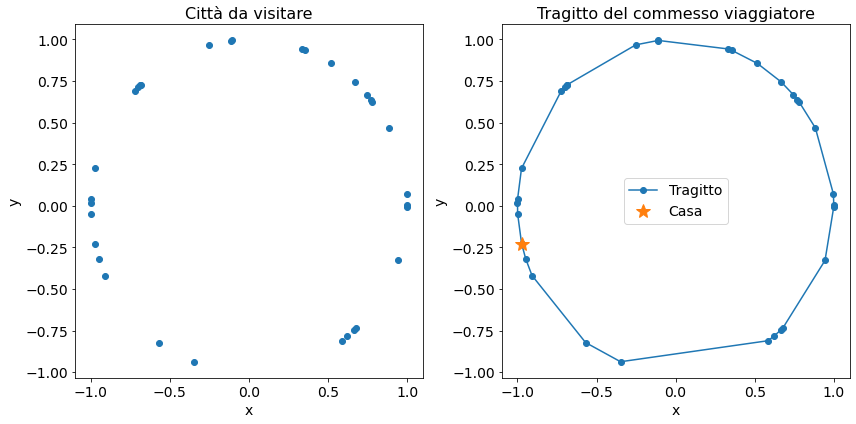

In [4]:
# Grafico delle posizioni delle città
x,y = (np.genfromtxt('./Data/cities_circ.dat', usecols=i, autostrip=True) for i in range(2))

plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(x,y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Città da visitare', fontsize=16)

# Grafico del percorso seguito dal TS
x,y = (np.genfromtxt('./Data/cities_final_circ.dat', usecols=i, autostrip=True) for i in range(2))

plt.subplot(1,2,2)
plt.plot(x,y, 'o-', label='Tragitto')
plt.plot(x[0],y[0],'*', markersize=15, label='Casa')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Tragitto del commesso viaggiatore', fontsize=16)
plt.legend(loc=0)

plt.tight_layout()
plt.show()

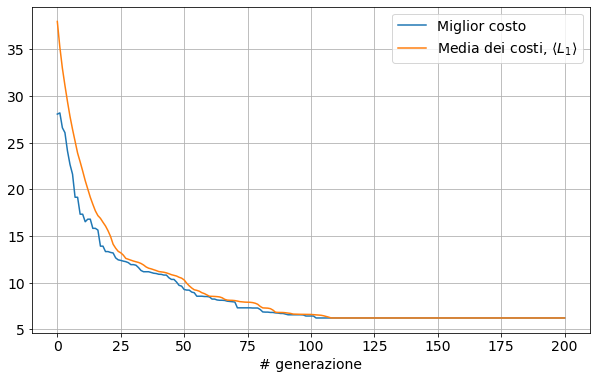

In [5]:
generation, fitness = (np.genfromtxt('./Data/cost_circ.dat', usecols=i, autostrip=True) for i in range(2))

plt.subplots(figsize=(10,6))
plt.plot(generation, fitness, label="Miglior costo")
generation, fitness = (np.genfromtxt('./Data/cost_ave_circ.dat', usecols=i, autostrip=True) for i in range(2))

plt.plot(generation, fitness, label=r"Media dei costi, $\langle L_1\rangle$")
plt.xlabel('# generazione')
plt.legend(loc=1)
plt.grid(True)
plt.show()

Ora mostriamo il medesimo procedimento, ma generando le città **in un quadrato** centrato nell'origine e di lato $l=2$.

I risultati sono molto simili al caso precedente e i valori di $p$, $p_\text{m}$, $p_\text{c}$, $n_\text{pop}$, $n_\text{gen}$ e numero di città sono invariati.

In [6]:
replace_line('input.dat', 0, '1\n') # città nel quadrato
subprocess.call("./main.exe")

print('Codice eseguito!')

Codice eseguito!


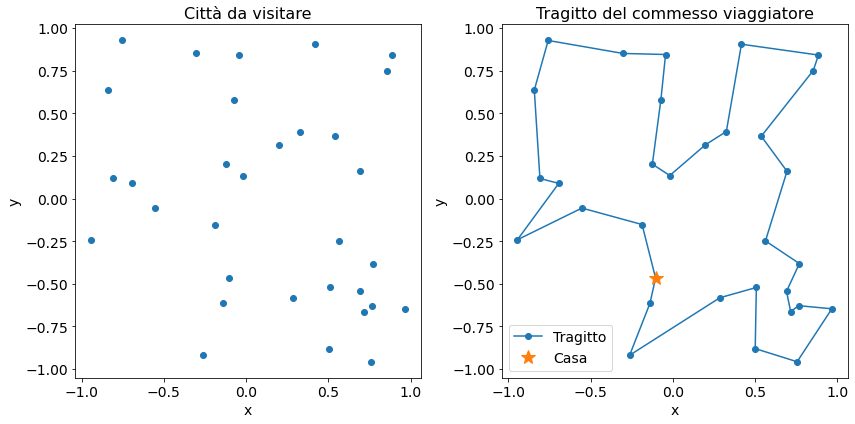

In [7]:
# Grafico delle posizioni delle città
x,y = (np.genfromtxt('./Data/cities_square.dat', usecols=i, autostrip=True) for i in range(2))

plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(x,y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Città da visitare', fontsize=16)

# Grafico del percorso seguito dal TS
x,y = (np.genfromtxt('./Data/cities_final_square.dat', usecols=i, autostrip=True) for i in range(2))

plt.subplot(1,2,2)
plt.plot(x,y, 'o-', label='Tragitto')
plt.plot(x[0],y[0],'*', markersize=15, label='Casa')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Tragitto del commesso viaggiatore', fontsize=16)
plt.legend(loc=0)

plt.tight_layout()
plt.show()

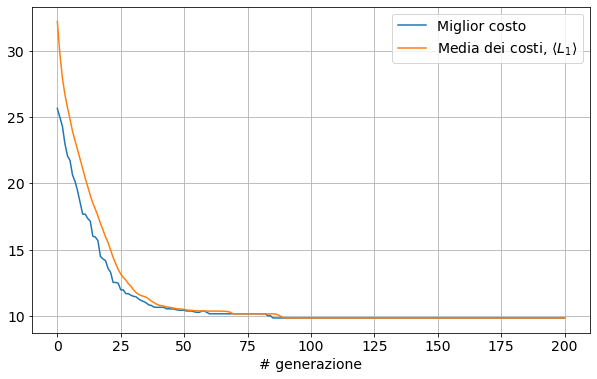

In [8]:
generation, fitness = (np.genfromtxt('./Data/cost_square.dat', usecols=i, autostrip=True) for i in range(2))

plt.subplots(figsize=(10,6))
plt.plot(generation, fitness, label="Miglior costo")
generation, fitness = (np.genfromtxt('./Data/cost_ave_square.dat', usecols=i, autostrip=True) for i in range(2))

plt.plot(generation, fitness, label=r"Media dei costi, $\langle L_1\rangle$")
plt.xlabel('# generazione')
plt.legend(loc=1)
plt.grid(True)
plt.show()